In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob
from datetime import datetime, timedelta, date
from statistics import mean, median, mode

## Stocks Data

In [2]:
sp500 = pd.read_csv('../GSPC.csv')

try:
    sp500['Close_Diff'] = pd.to_numeric(sp500['Close']).diff()
    sp500['Close_Diff_Increase'] = sp500['Close_Diff'] > 0
except:
    print(f'Unable to calculate diff for {col}')
    
sp500 = sp500[~sp500['Close_Diff'].isna()]

In [3]:
sp500.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Close_Diff,Close_Diff_Increase
1,2017-01-04,2261.600098,2272.820068,2261.600098,2270.750000,2270.750000,3764890000,12.919922,True
2,2017-01-05,2268.179932,2271.500000,2260.449951,2269.000000,2269.000000,3761820000,-1.750000,False
3,2017-01-06,2271.139893,2282.100098,2264.060059,2276.979980,2276.979980,3339890000,7.979980,True
4,2017-01-09,2273.590088,2275.489990,2268.899902,2268.899902,2268.899902,3217610000,-8.080078,False
5,2017-01-10,2269.719971,2279.270020,2265.270020,2268.899902,2268.899902,3638790000,0.000000,False


In [4]:
# Plots a trend for a symbol in the dfs dictionary for the col specified. Standardized divides all data by the mean
def plot_trend(df, col, standardize=False):
    # Figsize
    plt.figure(figsize=(10,6))
    
    # Plot stock price
    trend = df[col] / np.mean(df[col]) if standardize else df[col]
    plt.plot(trend)
    date = df.Date
        
    # Plot config
    locs, _ = plt.xticks()
    plt.xticks(locs[1:-1], date[0:-1:len(date)//(len(locs)-3)])
    plt.title(f'Standardized {col} over Time' if standardize else f'{col} over Time')
    plt.xlabel('Date')
    plt.ylabel(col)
    plt.show()

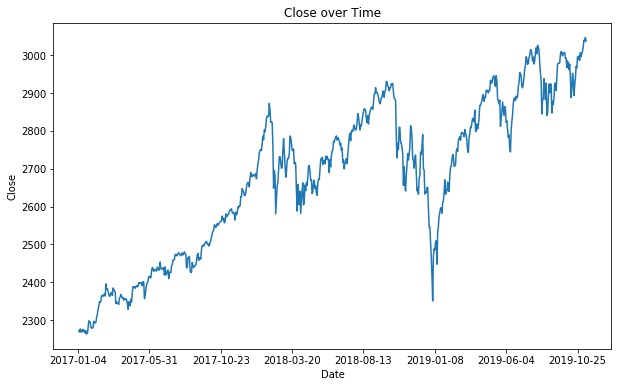

In [5]:
plot_trend(sp500, 'Close')

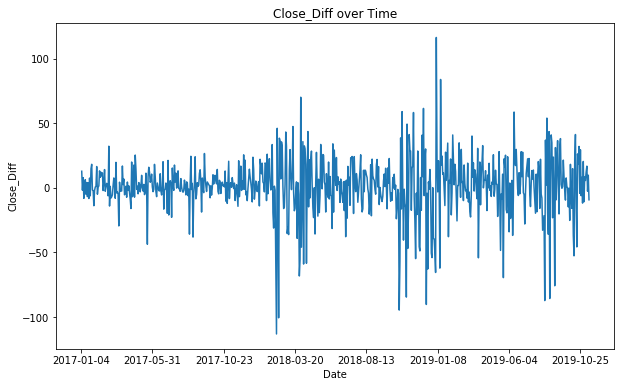

In [6]:
plot_trend(sp500, 'Close_Diff')

## News Data

In [7]:
news = pd.concat([pd.read_csv('../nytimes_2015.csv'), 
                  pd.read_csv('../nytimes_2016.csv'), 
                  pd.read_csv('../nytimes_2017.csv'), 
                  pd.read_csv('../nytimes_2018.csv'), 
                  pd.read_csv('../nytimes_2019.csv')], ignore_index=True)

In [8]:
print(len(news))
news.head()

82533


,web_url,snippet,lead_paragraph,abstract,print_page,source,headline,headline_kicker,headline_content_kicker,headline_print_headline,...,headline_seo,headline_sub,keywords,pub_date,document_type,news_desk,section_name,byline,type_of_material,word_count
0,https://www.nytimes.com/2015/01/08/world/ameri...,"Born through a mix of frustration, satire and ...","MONTERREY, Mexico — Inside a large, open-air b...","Born through a mix of frustration, satire and ...",9.0,The New York Times,A Bus Takes a Local Route to Fighting Mexican ...,Monterrey Journal,NaN,A Bus Takes a Local Route to Fighting Mexican ...,...,NaN,NaN,"[{'name': 'persons', 'value': 'Villegas, Pauli...",2015-01-08T00:45:08+0000,article,Foreign,World,"{'original': 'By Paulina Villegas', 'person': ...",News,1030
1,https://www.nytimes.com/2015/01/11/business/mu...,So-called dark trading — when computers serve ...,"JUDGING solely by the name, stock trading in s...",So-called dark trading — when computers serve ...,29.0,The New York Times,The Rise of Trading in the Dark,Datapoints,NaN,The Rise of Trading in the Dark,...,NaN,NaN,"[{'name': 'subject', 'value': 'Stocks and Bond...",2015-01-09T21:44:42+0000,article,SundayBusiness,Business Day,"{'original': 'By Anna Bernasek', 'person': [{'...",News,366
2,https://www.nytimes.com/2015/01/11/business/fo...,"In the fixed-income market, 2014 was frustrati...",BONDS confounded conventional wisdom in 2014 w...,"In the fixed-income market, 2014 was frustrati...",16.0,The New York Times,"For Bond Investors, That Other Shoe Still Didn...",NaN,NaN,"For Bond Investors, the Other Shoe Still Didn’...",...,NaN,NaN,"[{'name': 'subject', 'value': 'Stocks and Bond...",2015-01-09T21:46:05+0000,article,NODESK,Business Day,"{'original': 'By Carla Fried', 'person': [{'fi...",News,1269
3,https://www.nytimes.com/2015/01/11/business/pe...,A Canadian investor takes a chance on a pace-s...,The typical origin story for a tech company in...,A Canadian investor takes a chance on a pace-s...,1.0,The New York Times,The Uphill Push to Save a Bike-Share Pioneer,NaN,NaN,The Uphill Push to Save a Bike-Share Pioneer,...,NaN,NaN,"[{'name': 'subject', 'value': 'Bicycles and Bi...",2015-01-09T21:03:51+0000,article,SundayBusiness,Business Day,"{'original': 'By Ian Austen', 'person': [{'fir...",News,1923
4,https://www.nytimes.com/2015/01/06/business/in...,"The euro's continued plunge, to a nine-year lo...",FRANKFURT — The value of the euro fell to its ...,"The euro's continued plunge, to a nine-year lo...",5.0,The New York Times,Falling Euro Fans Fears of a Regional Slowdown,NaN,NaN,Sliding Euro Fans Fears of a Slowdown,...,NaN,NaN,"[{'name': 'persons', 'value': 'Ewing, Jack', '...",2015-01-05T21:05:04+0000,article,Business,Business Day,"{'original': 'By Jack Ewing', 'person': [{'fir...",News,1157


### Delete Irrelevant Columns

In [9]:
news = news.drop(['web_url', 'byline', 'headline_print_headline', 'document_type'], axis=1)

In [10]:
# these are missing more than abstract and contain similar info
news = news.drop(['snippet', 'lead_paragraph'], axis=1)

# all missing data
news = news.drop(['headline_content_kicker', 'headline_name', 'headline_seo', 'headline_sub'], axis=1)

### Transform Columns to be More Useful

In [11]:
# make headline include kicker
news['full_headline'] = news[['headline', 'headline_kicker']].apply(lambda x: x.str.cat(sep=': '), axis=1)

del news['headline_kicker']
del news['headline']

In [12]:
# create whether or not the article was in print
news['is_print'] = news['print_page'].isna()
del news['print_page']

### Change to One-Hot Encoding

In [13]:
# from type of material
type_dummies = pd.get_dummies(news['type_of_material'].fillna('Other'), prefix='Type')
news = pd.concat([news, type_dummies], axis=1, join='inner')
news.rename(columns={'Type_briefing': 'Type_Briefing'}, inplace=True)

del news['type_of_material']

In [14]:
# from source
source_dummies = pd.get_dummies(news['source'].fillna('Other'), prefix='Source')
news = pd.concat([news, source_dummies], axis=1, join='inner')

del news['source']

In [15]:
# from news desk
news_desk_dummies = pd.get_dummies(news['news_desk'].fillna('Other'), prefix='Desk')
news = pd.concat([news, news_desk_dummies], axis=1, join='inner')

del news['news_desk']

In [16]:
# from section name
section_name_dummies = pd.get_dummies(news['section_name'], prefix='Section')
news = pd.concat([news, section_name_dummies], axis=1, join='inner')

del news['section_name']

### Change Keywords to Many-Hot Encoding

In [17]:
import ast
from collections import Counter

counter = Counter()

# Get list of all keywords
def get_most_common(x):
    keywords = set()
    for word in ast.literal_eval(x):
        keywords.add(word['value'])
    counter.update(keywords)
    return keywords

news['keywords'] = news['keywords'].apply(get_most_common)

# Pick top 100
most_common = set()
for word, counts in counter.most_common(100):
    most_common.add(word)

# Get the intersection of article's keywords and top 100
def get_keywords(x):
    keywords = x.intersection(most_common)
    return '|'.join(keywords)

# Many-hot
keywords_dummies = news['keywords'].apply(get_keywords).str.get_dummies()
keywords_dummies.rename(columns={x: 'Keyword_' + x for x in keywords_dummies.columns}, inplace=True)
news = pd.concat([news, keywords_dummies], axis=1, join='inner')

del news['keywords']

### Time & Date

In [18]:
def time_of_day(hour):
    if hour >= 6 and hour < 12:
        return 0
    if hour >= 12 and hour < 17:
        return 1
    if hour >= 17 and hour < 22:
        return 2
    return 3

news['time'] = news['pub_date'].apply(lambda x: time_of_day(datetime.fromisoformat(x[:-5]).time().hour))
news['date'] = news['pub_date'].apply(lambda x: str(date.fromisoformat(x.strip()[:10]) + timedelta(days=1)))

del news['pub_date']

### Sentiment Analysis

In [19]:
# Adds sentiment by TextBlob (polarity and subjectivity) to a df based on its col column
def add_sentiment(df, col):
    def polarity_and_subjectivity(x):
        sentiment = TextBlob(str(x)).sentiment
        return sentiment.polarity, sentiment.subjectivity
    df[f'{col}_polarity'], df[f'{col}_subjectivity'] = zip(*df[col].map(polarity_and_subjectivity))

add_sentiment(news, 'abstract')
add_sentiment(news, 'full_headline')

news = news.drop(['abstract', 'full_headline'], axis=1)

## Model 1 - Random Forest Classifier

In [20]:
df = news.merge(sp500, left_on='date', right_on='Date')
df = df.drop(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Close_Diff'], axis=1)

In [21]:
X = df.drop(['date', 'Close_Diff_Increase'], axis=1)
Y = df['Close_Diff_Increase']

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

classifier = RandomForestClassifier(max_depth=2)
classifier.fit(X_train, Y_train)
classifier.score(X_test, Y_test)

0.583962422412347

In [23]:
sum(classifier.predict(X_test)) / len(X_test)

1.0

In [24]:
# train = df[df['date'].apply(lambda x: date.fromisoformat(x) < date.fromisoformat('2018-01-01'))]
# validate = df[df['date'].apply(lambda x: date.fromisoformat(x) >= date.fromisoformat('2018-01-01') and date.fromisoformat(x) < date.fromisoformat('2019-01-01'))]
# test = df[df['date'].apply(lambda x: date.fromisoformat(x) >= date.fromisoformat('2019-01-01'))]
train = df[df['date'].apply(lambda x: date.fromisoformat(x) < date.fromisoformat('2019-01-01'))]
test = df[df['date'].apply(lambda x: date.fromisoformat(x) >= date.fromisoformat('2019-01-01'))]

X_train = train.drop(['date', 'Close_Diff_Increase'], axis=1)
# X_validate = validate.drop(['date', 'Close_Diff_Increase'], axis=1)
X_test = test.drop(['Close_Diff_Increase'], axis=1)
Y_train = train['Close_Diff_Increase']
# Y_validate = validate['Close_Diff_Increase']
Y_test = test[['date', 'Close_Diff_Increase']]

In [25]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2)
classifier.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [26]:
predictions = X_test.groupby('date').apply(classifier.predict).apply(mode)
print(sum(predictions.values == Y_test.groupby('date').first()['Close_Diff_Increase'].values) / len(predictions))

0.5781990521327014


In [27]:
sum(predictions) / len(predictions)

1.0

In [33]:
# # messing with cutoff

# def do_something(values):
#     values.sort()
#     n = len(values) // 5
#     return (sum(values[:n]) + sum(values[-n:])) / (2*n)

# trues = []
# falses = []
# for _, y in test.groupby('date'):
#     x = do_something(classifier.predict_proba(X_test.loc[y.index])[:,0])
#     if Y_test[y.index].iloc[0]:
#         trues.append(x)
#     else:
#         falses.append(x)

## Model 2

In [34]:
def average(results):
    return sum(results) / len(results)

def weighted_average(results, weights):
    return results.dot(abs(weights)) / sum(abs(weights))

In [30]:
df = news.merge(sp500, left_on='date', right_on='Date')
df = df.drop(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], axis=1)

In [31]:
train = df[df['date'].apply(lambda x: date.fromisoformat(x) < date.fromisoformat('2019-01-01'))]
test = df[df['date'].apply(lambda x: date.fromisoformat(x) >= date.fromisoformat('2019-01-01'))]

X_train = train.drop(['date', 'Close_Diff', 'Close_Diff_Increase'], axis=1)
Y_train = train['Close_Diff']

X_test = test.drop(['Close_Diff', 'Close_Diff_Increase'], axis=1)
Y_test = test[['date', 'Close_Diff', 'Close_Diff_Increase']]

In [35]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, Y_train)

predictions = X_test.groupby('date').apply(regressor.predict).apply(lambda x: median(x) > 0)
results = predictions.values == Y_test.groupby('date').first()['Close_Diff_Increase'].values
print(f'Average: {average(results)}')
print('Weighted Average: {}'.format(weighted_average(results, abs(Y_test.groupby('date').first()['Close_Diff']))))

Average: 0.5734597156398105
Weighted Average: 0.6110361915205293


In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

regressor = LinearRegression()
regressor.fit(X_train, Y_train)

predictions = X_test.groupby('date').apply(regressor.predict).apply(lambda x: sum(x))
mean_squared_error(Y_test.groupby('date').first()['Close_Diff'], predictions)

16667.655371576864